## Project – Neural Network for Image Recognition of Letters A, B, and C

## AIM:Build and train a 2-layer feedforward neural network (with one hidden layer, sigmoid activation) to recognize binary pixel representations of letters A, B, and C.

## Step1: import and setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt


## Step2:Define Binary Patterns for A, B, and C

In [ ]:
#Each image is a 5×6 (rows × columns) grid flattened into a 30-element vector.

In [3]:
def create_letter_A():
    return np.array([
        [0,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,1],
        [1,0,0,0,1],
        [1,0,0,0,1],
        [1,0,0,0,1]
    ]).reshape(-1, 1)

def create_letter_B():
    return np.array([
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,0,0,0,1],
        [1,1,1,1,0]
    ]).reshape(-1, 1)

def create_letter_C():
    return np.array([
        [0,1,1,1,1],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [0,1,1,1,1]
    ]).reshape(-1, 1)


## Step3: Prepare data

In [ ]:
Features(X) and Labels(Y)

In [5]:
X = np.hstack([create_letter_A(), create_letter_B(), create_letter_C()])  # shape: (30, 3)
y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
]).T  # shape: (3, 3)



## Neural Network Functions

In [ ]:
#Initialization

In [7]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2


In [ ]:
# Activating functions

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)


In [ ]:
# Forward propogation

In [9]:
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A1, A2


## Backward Propagation

In [10]:
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def backward(X, y, A1, A2, W2):
    m = X.shape[1]
    dZ2 = (A2 - y) * sigmoid_derivative(A2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2


## Training Loop

In [12]:
def train(X, y, hidden_size=10, epochs=10000, lr=0.5):
    input_size = X.shape[0]
    output_size = y.shape[0]

    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    losses = []
    for epoch in range(epochs):
        A1, A2 = forward(X, W1, b1, W2, b2)
        loss = compute_loss(y, A2)
        losses.append(loss)

        dW1, db1, dW2, db2 = backward(X, y, A1, A2, W2)

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W1, b1, W2, b2, losses


## Plot Training Loss

Epoch 0, Loss: 0.2518
Epoch 1000, Loss: 0.0021
Epoch 2000, Loss: 0.0008
Epoch 3000, Loss: 0.0005
Epoch 4000, Loss: 0.0003
Epoch 5000, Loss: 0.0003
Epoch 6000, Loss: 0.0002
Epoch 7000, Loss: 0.0002
Epoch 8000, Loss: 0.0001
Epoch 9000, Loss: 0.0001


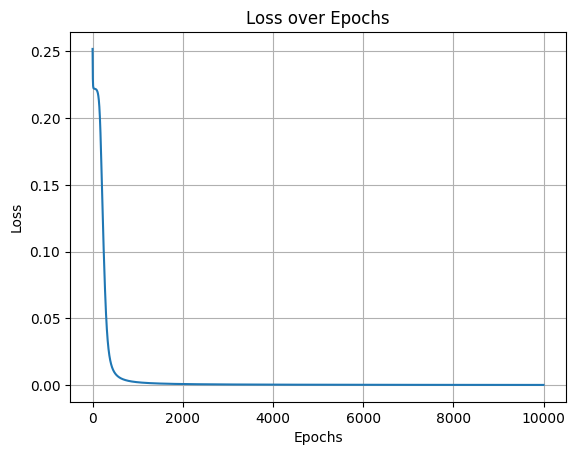

In [13]:
W1, b1, W2, b2, losses = train(X, y)

plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()


## Testing the Model

True: A, Predicted: A


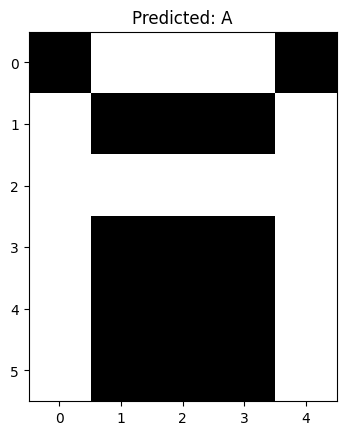

True: B, Predicted: B


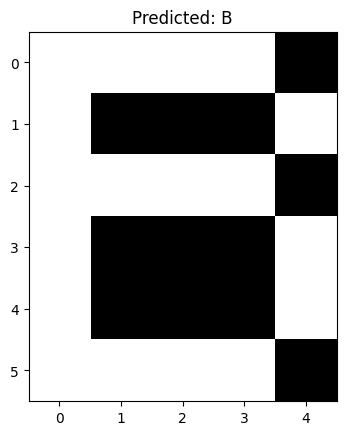

True: C, Predicted: C


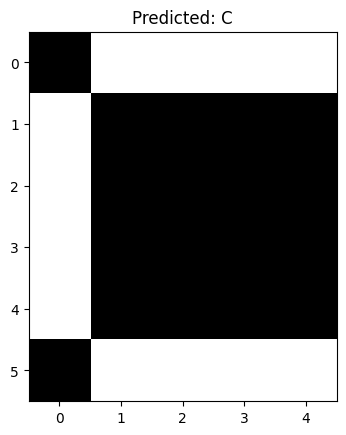

In [14]:
def predict(X_input, W1, b1, W2, b2):
    _, A2 = forward(X_input, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)

# Test on input images
for i, letter in enumerate(["A", "B", "C"]):
    img = X[:, i].reshape(30, 1)
    pred = predict(img, W1, b1, W2, b2)
    print(f"True: {letter}, Predicted: {['A','B','C'][pred[0]]}")
    plt.imshow(img.reshape(6,5), cmap='gray')
    plt.title(f"Predicted: {['A','B','C'][pred[0]]}")
    plt.show()
